In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Transforming Data

### What?
* A transformation is a rescaling of the data using a function, to make it easier to build statistical models against the data
* Types of transformation
    * log
    * square root
    * exponential
    * inverse
    * truncation
* In log and square root transformation, high values get compressed and low values become more spread out, so left skewed distributions become worst after a square root transformation. 
* The downside of using transformations is that it reduces the ease of interpreting the results

### Why?
* Normalizing a skewed distribution
* Transforming a non-linear relationship between 2 variables into a linear one
* Focusing on visualizing certain parts of your data

### Resources
* https://quantifyinghealth.com/square-root-transformation/
* Open Stats Intro

## Theory

### log

In [2]:
np.log2([0, 1, 2, 4, 8, 16, 32, 64])

<ipython-input-2-55f1399bf341>:1: RuntimeWarning: divide by zero encountered in log2
  np.log2([0, 1, 2, 4, 8, 16, 32, 64])


array([-inf,   0.,   1.,   2.,   3.,   4.,   5.,   6.])

In [3]:
np.log10([1, 10, 100, 1000, 10000])

array([0., 1., 2., 3., 4.])

In [4]:
# logaritmos naturais, número de euler
np.log([0, 1, 2, 4, 8, 16, 32, 64])

<ipython-input-4-296b8594bb94>:2: RuntimeWarning: divide by zero encountered in log
  np.log([0, 1, 2, 4, 8, 16, 32, 64])


array([      -inf, 0.        , 0.69314718, 1.38629436, 2.07944154,
       2.77258872, 3.4657359 , 4.15888308])

In [5]:
gamma_dist = np.random.gamma(shape=1, scale=2 , size=1000)

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

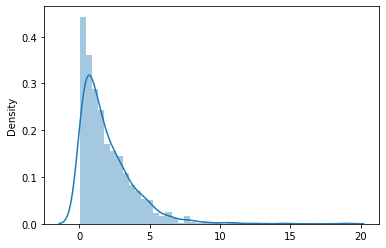

In [6]:
sns.distplot(gamma_dist)

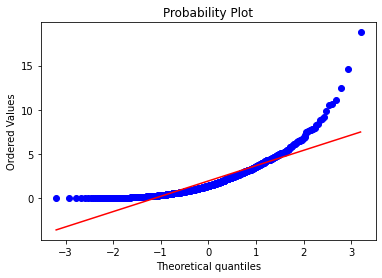

In [7]:
fig, ax = plt.subplots()

stats.probplot(gamma_dist, plot=ax);

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

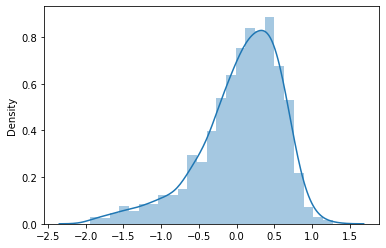

In [8]:
sns.distplot(np.log10(gamma_dist))

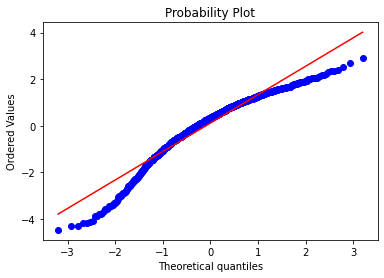

In [9]:
fig, ax = plt.subplots()

stats.probplot(np.log(gamma_dist), plot=ax);

### square root

In [10]:
np.sqrt([1, 4, 9, 16, 25, 36])

array([1., 2., 3., 4., 5., 6.])

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

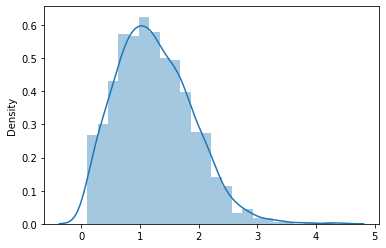

In [11]:
sns.distplot(np.sqrt(gamma_dist))

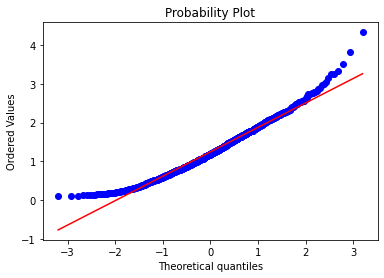

In [12]:
fig, ax = plt.subplots()

stats.probplot(np.sqrt(gamma_dist), plot=ax);

## Real Data

In [14]:
df = pd.read_csv('data/winequality-red.csv')

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='free sulfur dioxide'>

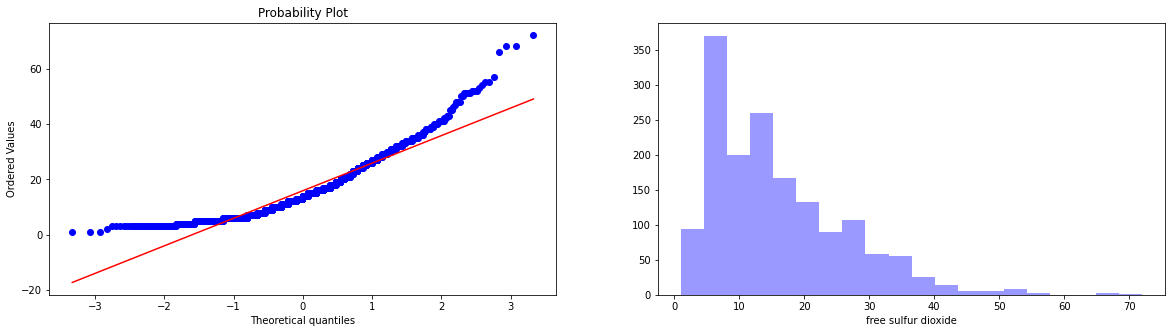

In [15]:
fig, axs = plt.subplots(1,2, figsize=(20,5))

stats.probplot(df['free sulfur dioxide'], plot=axs[0])
sns.distplot(df['free sulfur dioxide'], color='blue', bins=20, kde=False, ax=axs[1])

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='free sulfur dioxide'>

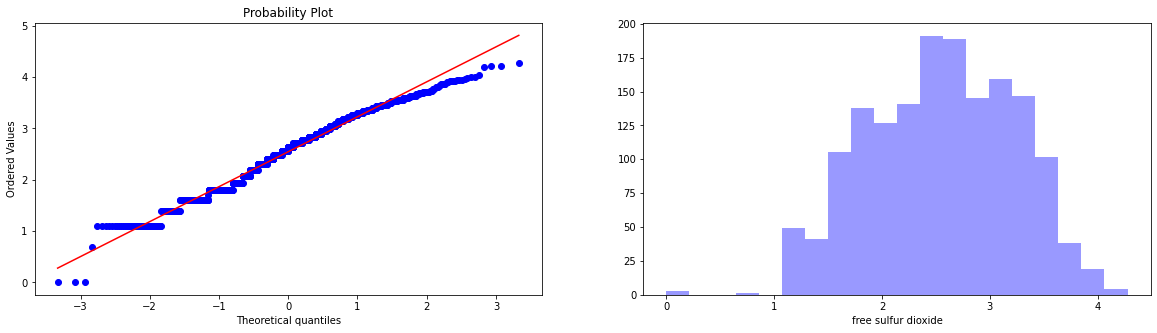

In [16]:
fig, axs = plt.subplots(1,2, figsize=(20,5))

stats.probplot(np.log(df['free sulfur dioxide']), plot=axs[0])
sns.distplot(np.log(df['free sulfur dioxide']), color='blue', bins=20, kde=False, ax=axs[1])

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='free sulfur dioxide'>

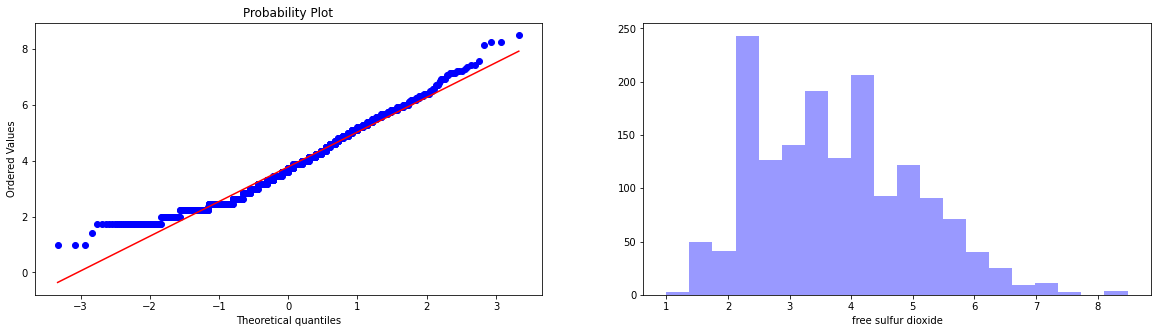

In [17]:
fig, axs = plt.subplots(1,2, figsize=(20,5))

stats.probplot(np.sqrt(df['free sulfur dioxide']), plot=axs[0])
sns.distplot(np.sqrt(df['free sulfur dioxide']), color='blue', bins=20, kde=False, ax=axs[1])

### BOXCOX transformation

The BoxCox transformation transforms the variable into a more gaussian-shaped distribution.

<font size="6">
    \begin{equation}
y(\lambda) =  \begin{cases}
      \frac{y^{\lambda}-1}{\lambda} & \text{if $\lambda \neq 0$ }\\
      \text{log} (y) & \text{if $\lambda = 0$}
    \end{cases}       
\end{equation}
</font>

Leading to the following common transformations.
<font size="4"> 


</font>

| Lambda value (λ) | BoxCox transformation (Y’) |
|------------------|-----------------------|
| -3               | <b>$y^{-3} $= $1/y^{3}$      </b>     |
| -2               | <b>$y^{-2} $= $1/y^{2}$        </b>   |
| -1               | <b>$y^{-1} $= $1/y^{1}$        </b>   |
| -0.5             | <b>$y^{-0.5} $= 1/($\sqrt{y}$)  </b>   |
| <span style="color:red">0 </span>               | <b><span style="color:red">$log(Y) $ </span>           </b>|
| 0.5              | <b>$y^{0.5} $= $\sqrt{y}$       </b>   |
| 1                | <b>$y^{1} $= y            </b>   |
| 2                | <b>$y^{2} $               </b>   |
| 3                | <b>$y^{3} $               </b>   |

BoxCox will test the transformation that best suits your data. It will choose the one which gets closer to the normal distribution.

In [18]:
from scipy.stats import boxcox

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

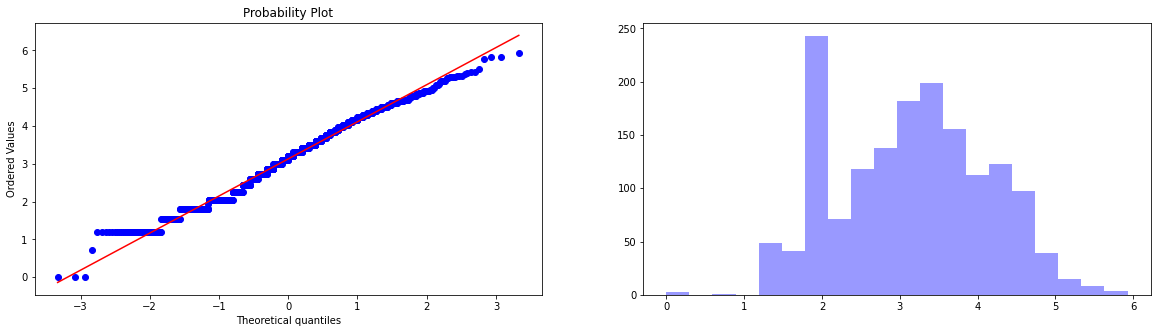

In [19]:
fig, axs = plt.subplots(1,2, figsize=(20,5))

stats.probplot(boxcox(df['free sulfur dioxide'])[0], plot=axs[0])
sns.distplot(boxcox(df['free sulfur dioxide'])[0], color='blue', bins=20, kde=False, ax=axs[1])

In [20]:
boxcox(df['free sulfur dioxide'])[1]

0.14508106677869678